<a href="https://colab.research.google.com/github/ChauNgocHoang/Chau-Ngoc-Hoang/blob/main/naucom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=980465c45e72b6cca9e765e3d301a01cfe4b37c9d17313ec9dafaa19b467ce7b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


8.333333333333332


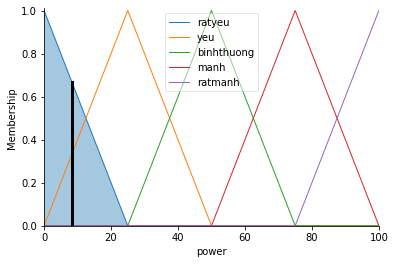

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1), 'power')
time ['ratcham'] = fuzz.trimf(time.universe,[10,10,30])
time ['cham']=  fuzz.trimf(time.universe,[10,30,60])
time ['binhthuong']= fuzz.trimf(time.universe,[30,60,90])
time ['nhanh']= fuzz.trimf(time.universe,[60,90,120])
time ['ratnhanh']= fuzz.trimf(time.universe,[90,120,120])

rice['ratit'] = fuzz.trimf(rice.universe,[100,100,250])
rice['it'] = fuzz.trimf(rice.universe,[100,250,500])
rice['binhthuong'] = fuzz.trimf(rice.universe,[250,500,750])
rice['nhieu'] = fuzz.trimf(rice.universe,[500,750,1000])
rice['ratnhieu'] = fuzz.trimf(rice.universe,[750,1000,1000])

power['ratyeu'] = fuzz.trimf(power.universe,[0,0,25])
power['yeu'] = fuzz.trimf(power.universe,[0,25,50])
power['binhthuong'] = fuzz.trimf(power.universe,[25,50,75])
power['manh'] = fuzz.trimf(power.universe,[50,75,100])
power['ratmanh'] = fuzz.trimf(power.universe,[75,100,100])
#time.view()
#rice.view()
#power.view()
rule1 = ctrl.Rule(time['ratcham']&rice['ratit'],power['binhthuong'])
rule2 = ctrl.Rule(time['ratcham']&rice['it'],power['binhthuong'])
rule3 = ctrl.Rule(time['ratcham']&rice['binhthuong'],power['yeu'])
rule4 = ctrl.Rule(time['ratcham']&rice['nhieu'],power['yeu'])
rule5 = ctrl.Rule(time['ratcham']&rice['ratnhieu'],power['ratyeu'])
rule6 = ctrl.Rule(time['cham']&rice['ratnhieu'],power['yeu'])
rule7 = ctrl.Rule(time['cham']&rice['nhieu'],power['yeu'])
rule8 = ctrl.Rule(time['cham']&rice['binhthuong'],power['binhthuong'])
rule9 = ctrl.Rule(time['cham']&rice['it'],power['binhthuong'])
rule10 = ctrl.Rule(time['cham']&rice['ratit'],power['manh'])
rule11 = ctrl.Rule(time['binhthuong']&rice['ratnhieu'],power['yeu'])
rule12 = ctrl.Rule(time['binhthuong']&rice['nhieu'],power['binhthuong'])
rule13 = ctrl.Rule(time['binhthuong']&rice['binhthuong'],power['binhthuong'])
rule14 = ctrl.Rule(time['binhthuong']&rice['it'],power['manh'])
rule15 = ctrl.Rule(time['binhthuong']&rice['ratit'],power['manh'])
rule16 = ctrl.Rule(time['nhanh']&rice['ratnhieu'],power['binhthuong'])
rule17 = ctrl.Rule(time['nhanh']&rice['nhieu'],power['binhthuong'])
rule18 = ctrl.Rule(time['nhanh']&rice['binhthuong'],power['manh'])
rule19 = ctrl.Rule(time['nhanh']&rice['it'],power['manh'])
rule20 = ctrl.Rule(time['nhanh']&rice['ratit'],power['ratmanh'])
rule21 = ctrl.Rule(time['ratnhanh']&rice['ratnhieu'],power['binhthuong'])
rule22 = ctrl.Rule(time['ratnhanh']&rice['nhieu'],power['manh'])
rule23 = ctrl.Rule(time['ratnhanh']&rice['binhthuong'],power['manh'])
rule24 = ctrl.Rule(time['ratnhanh']&rice['it'],power['ratmanh'])
rule25 = ctrl.Rule(time['ratnhanh']&rice['ratit'],power['ratmanh'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['time']= 10
tipping.input['rice']= 1000
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)